In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PAKE SEMUA FITUR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data_obesitas


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_obesitas.duplicated().sum()

24

In [ ]:
data_obesitas.loc[data_obesitas.duplicated(keep=False), :]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
data_obesitas.drop_duplicates(inplace=True)


In [ ]:
data_obesitas

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

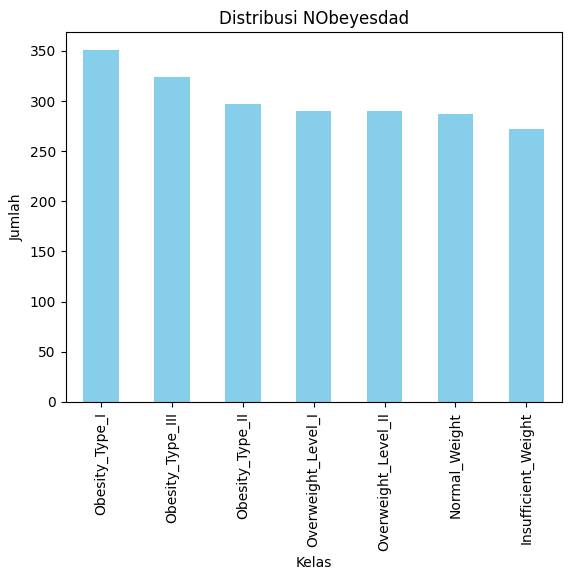

In [ ]:
import matplotlib.pyplot as plt

value_counts = data_obesitas['NObeyesdad'].value_counts()
value_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Distribusi NObeyesdad')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()


In [ ]:
data_obesitas.value_counts('CAEC')

,count
CAEC,
Sometimes,1761
Frequently,236
Always,53
no,37


In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])


In [ ]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

In [ ]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## basic rf + all fitur

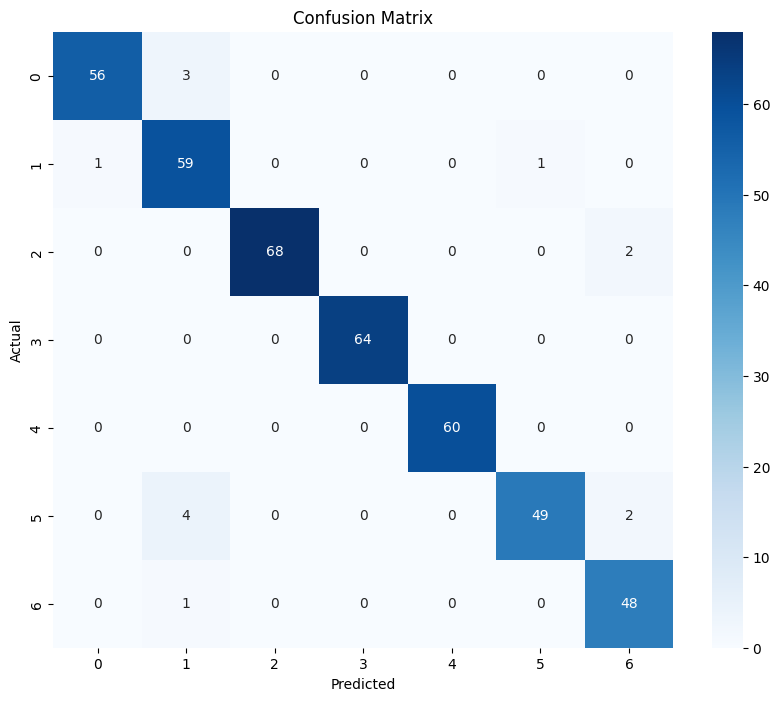

Akurasi: 0.9665071770334929
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.88      0.97      0.92        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.98      0.89      0.93        55
           6       0.92      0.98      0.95        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

                           Feature  Importance
3                           Weight    0.336708
2                           Height    0.101461
1                              Age    0.096514
6                             FCVC    0.086071
0                           Gender    0.067411
7                              NCP    0.051733
13                             TUE    0.043843
12                             FAF    0.041240
10                            CH2O    0.041163
8                             CAEC    0.031143
4   family_history_with_overweight    0.029007
14                            CALC    0.028733
15                          MTRANS    0.020287
5                             FAVC    0.017300
11                             SCC    0.005275
9                            SMOKE    0.002111


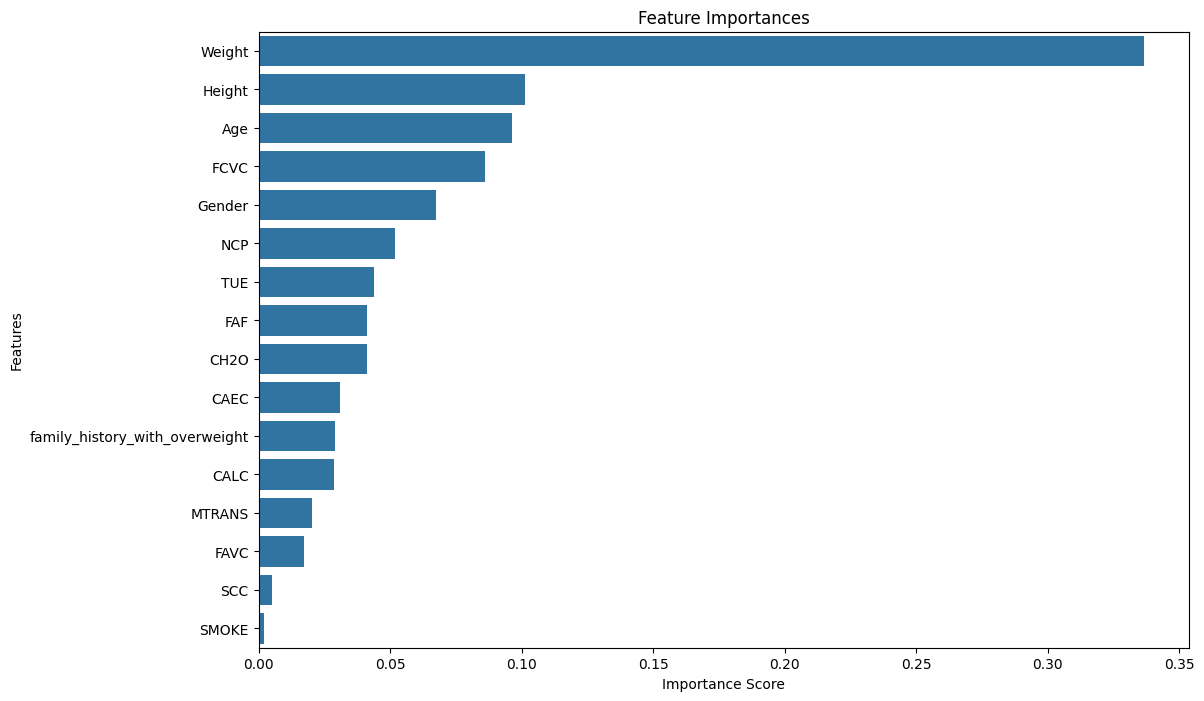

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil feature importances
feature_importances = rf.feature_importances_

# Jika nama fitur tersedia (misalnya X_train adalah DataFrame)
feature_names = X_train.columns

# Gabungkan nama fitur dengan nilai pentingnya
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Urutkan berdasarkan kepentingan
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan hasil dalam tabel
print(importance_df)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## gridsearch rf

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9484688281095467


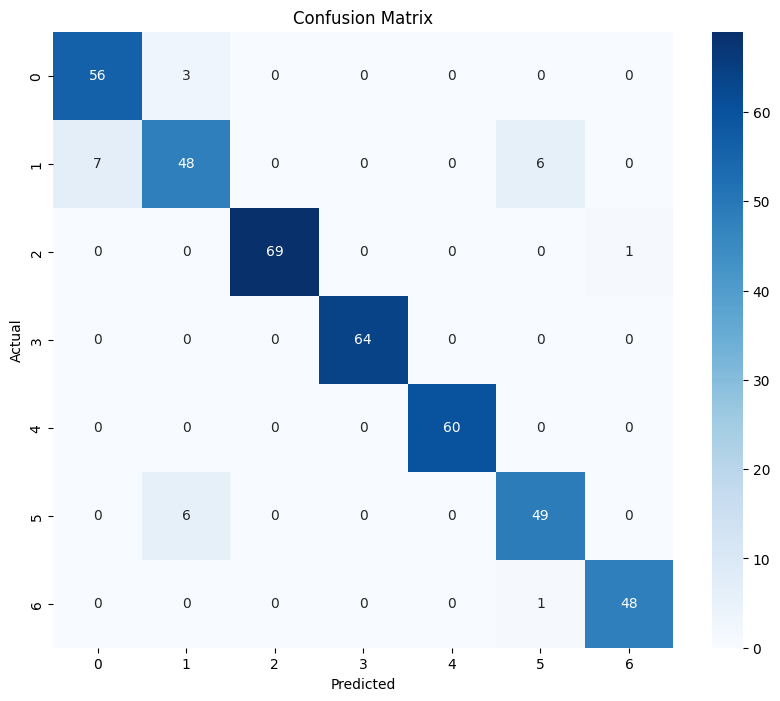

Akurasi: 0.9425837320574163
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.84      0.79      0.81        61
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.88      0.89      0.88        55
           6       0.98      0.98      0.98        49

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Cari parameter terbaik
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluasi pada data uji
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Laporan Kinerja
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


## manual + all fitur

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions


0.9736842105263158


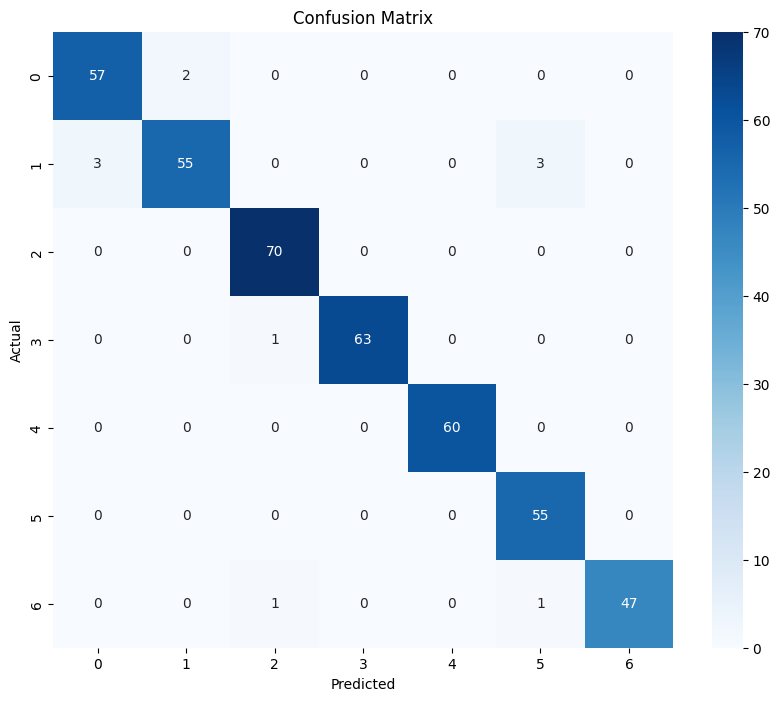

Akurasi: 0.9736842105263158
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.96      0.90      0.93        61
           2       0.97      1.00      0.99        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.93      1.00      0.96        55
           6       1.00      0.96      0.98        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=100,max_depth=20,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc =  accuracy(y_test, y_pred)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n",report )

In [ ]:
model_data = {
    'model' :clf,
    'enkoder' : label_encoder,
    'feature_use' : ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
    'train_size' :  {'baris' : X_train.shape[0],'persen': 0.8},
    'test_size' : {'baris': X_test.shape[0],'persen' : 0.2,},
    'parameter' : 'n_trees=20 ,max_depth=10,min_samples_split=2',
    'accuracy' : accuracy,
    'classification_report' : report,
    'confusion_matrix' : conf_matrix,
    'fitur' : X,
    'target' : y,
    'train_test_split': {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test},


}
model_data





{'model': <__main__.RandomForest_krisjen at 0x7b76d4ed7dc0>,
 'enkoder': LabelEncoder(),
 'feature_use': ['Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'FAVC',
  'FCVC',
  'NCP',
  'CAEC',
  'SMOKE',
  'CH2O',
  'SCC',
  'FAF',
  'TUE',
  'CALC',
  'MTRANS'],
 'train_size': {'baris': 1669, 'persen': 0.8},
 'test_size': {'baris': 418, 'persen': 0.2},
 'parameter': 'n_trees=20 ,max_depth=10,min_samples_split=2',
 'accuracy': 0.9712918660287081,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        59\n           1       0.93      0.90      0.92        61\n           2       0.99      1.00      0.99        70\n           3       1.00      0.98      0.99        64\n           4       1.00      1.00      1.00        60\n           5       0.93      0.96      0.95        55\n           6       1.00      0.98      0.99        49\n\n    accuracy                           0.97    

In [ ]:
!pip install joblib

In [ ]:
import joblib
# Simpan model dengan semua informasi terkait
joblib.dump(model_data, 'model_rf_with_all_params97.joblib')

['model_rf_with_all_params97.joblib']

# PAKE SEMUA FITUR + normalisai

## setelah dilakukan normalisasi tidak terlalu berpengaruh signifikan pada model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data_obesitas


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_obesitas.duplicated().sum()

24

In [ ]:
data_obesitas.loc[data_obesitas.duplicated(keep=False), :]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
data_obesitas.drop_duplicates(inplace=True)


In [ ]:
data_obesitas

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

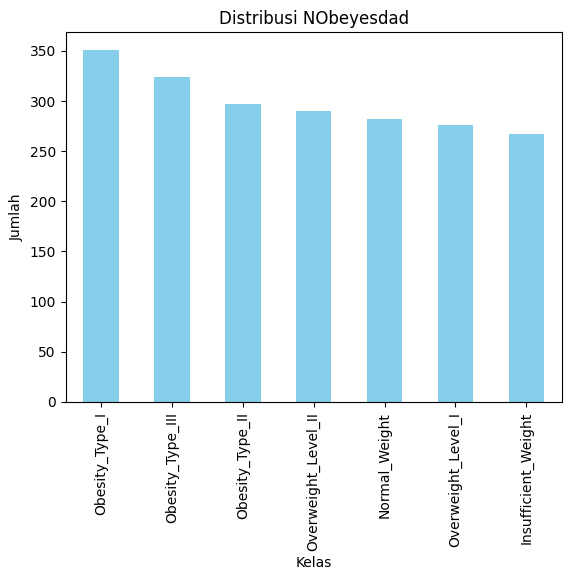

In [ ]:
import matplotlib.pyplot as plt

value_counts = data_obesitas['NObeyesdad'].value_counts()
value_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Distribusi NObeyesdad')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()


In [ ]:
data_obesitas.value_counts('CAEC')

,count
CAEC,
Sometimes,1761
Frequently,236
Always,53
no,37


In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])


In [ ]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

In [ ]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['Age','Height','Weight']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


array([[0.14893617, 0.67924528, 0.30597015],
       [0.08510638, 0.63539245, 0.093466  ],
       [0.17864902, 0.79075094, 0.16724732],
       ...,
       [0.1889906 , 0.64802075, 0.37991984],
       [0.19653834, 0.58680755, 0.43902496],
       [0.0804507 , 0.28301887, 0.19402985]])

## basic rf + all fitur + scaling

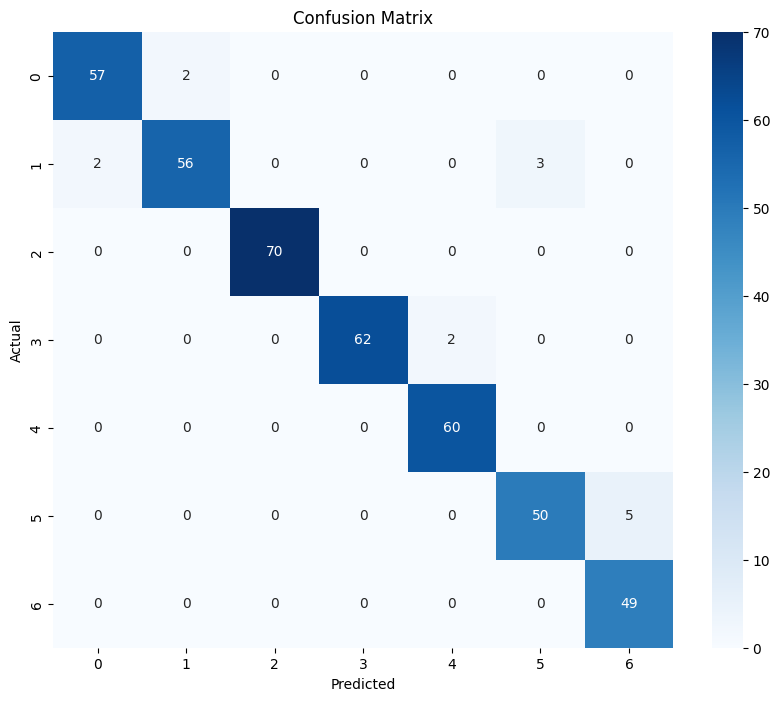

Akurasi: 0.9665071770334929
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.97      0.92      0.94        61
           2       1.00      1.00      1.00        70
           3       1.00      0.97      0.98        64
           4       0.97      1.00      0.98        60
           5       0.94      0.91      0.93        55
           6       0.91      1.00      0.95        49

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.97      0.97       418



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

## manual  + all fitur +scaling

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions


0.9569377990430622


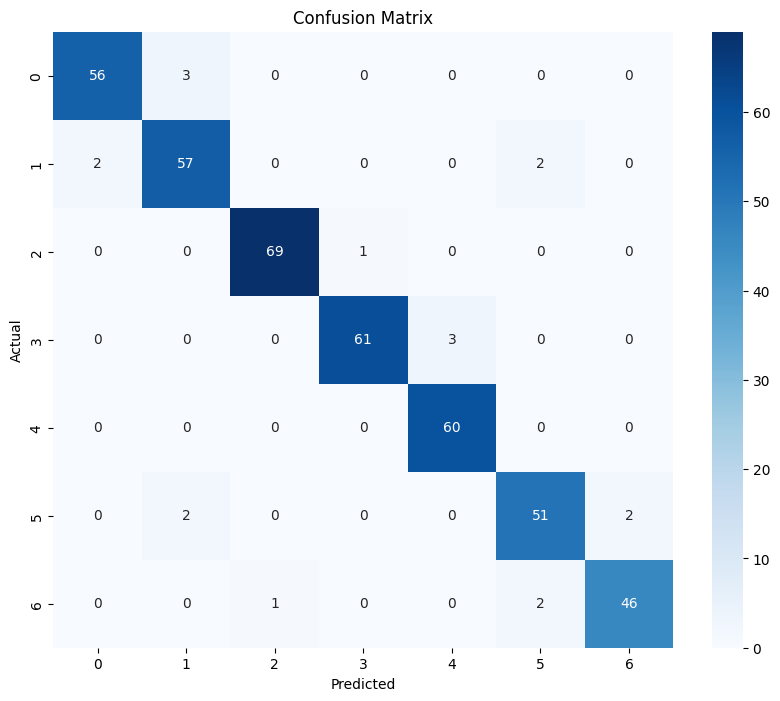

Akurasi: 0.9569377990430622
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.92      0.93      0.93        61
           2       0.99      0.99      0.99        70
           3       0.98      0.95      0.97        64
           4       0.95      1.00      0.98        60
           5       0.93      0.93      0.93        55
           6       0.96      0.94      0.95        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=100,max_depth=20,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc =  accuracy(y_test, y_pred)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n",report )

# TAMBAH BMI + ALL FITUR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data_obesitas.drop_duplicates(inplace=True)


In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])


In [ ]:
data_obesitas['BMI'] = round(data_obesitas['Weight'] / (data_obesitas['Height']) ** 2, 2)

In [ ]:
# data_obesitas.drop(columns=['Height','Weight'],inplace=True)

In [ ]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,24.39
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,24.24
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,23.77
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,26.85
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,44.90
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,43.74
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,43.54
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,44.07


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## rf import

Akurasi: 0.9880382775119617
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.95      0.98      0.97        61
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       1.00      0.96      0.98        55
           6       0.98      1.00      0.99        49

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



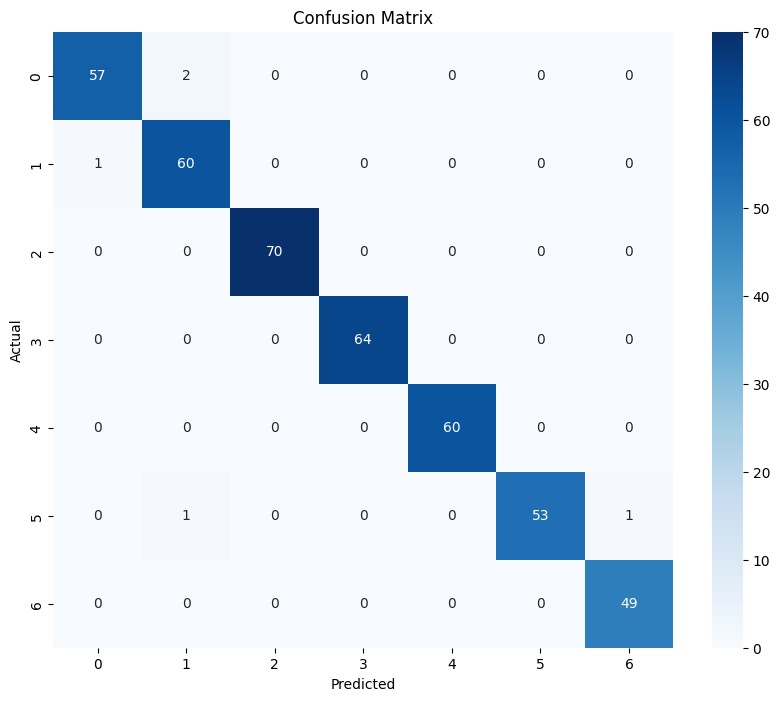

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

## mnaul + BMi

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

0.9760765550239234


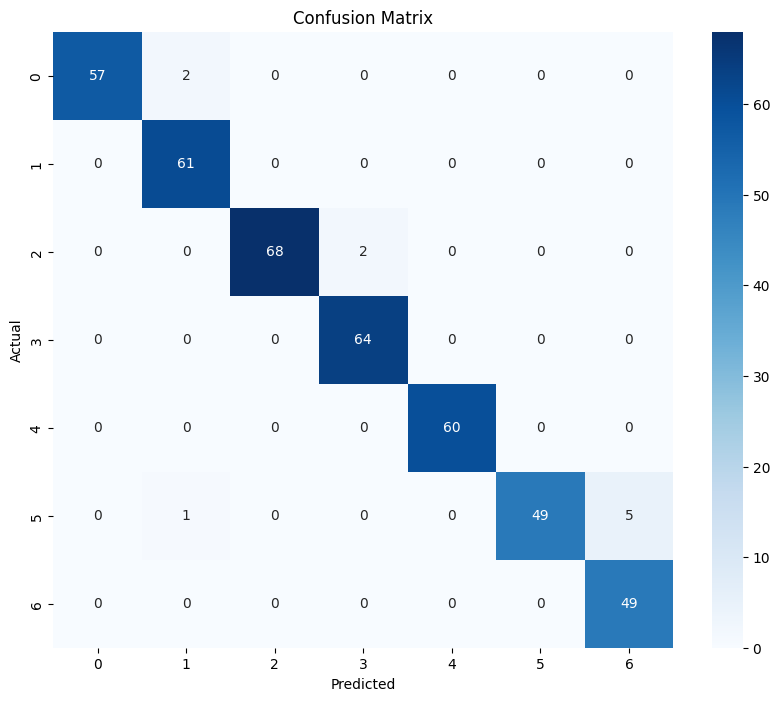

Akurasi: 0.9760765550239234
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.95      1.00      0.98        61
           2       1.00      0.97      0.99        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       1.00      0.89      0.94        55
           6       0.91      1.00      0.95        49

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.97       418
weighted avg       0.98      0.98      0.98       418



In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=100,max_depth=20,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc =  accuracy(y_test, y_pred)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n",report )

# SELEKSI DARI FITUR IMPORTANCE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data_obesitas.shape

(2111, 17)

In [ ]:
data_obesitas.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
data_obesitas.drop_duplicates(inplace=True)
data_obesitas.shape


(2087, 17)

In [ ]:
data_obesitas.value_counts('Gender')
#

,count
Gender,
Male,1052
Female,1035


In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])


In [ ]:
data_obesitas.drop(columns=['family_history_with_overweight','FAVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS'	],inplace=True)

In [ ]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [ ]:
X

,Gender,Age,Height,Weight,FCVC
0,0,21.000000,1.620000,64.000000,2.0
1,0,21.000000,1.520000,56.000000,3.0
2,1,23.000000,1.800000,77.000000,2.0
3,1,27.000000,1.800000,87.000000,3.0
4,1,22.000000,1.780000,89.800000,2.0
...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,3.0
2107,0,21.982942,1.748584,133.742943,3.0
2108,0,22.524036,1.752206,133.689352,3.0
2109,0,24.361936,1.739450,133.346641,3.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LIBRARY + fitur importance

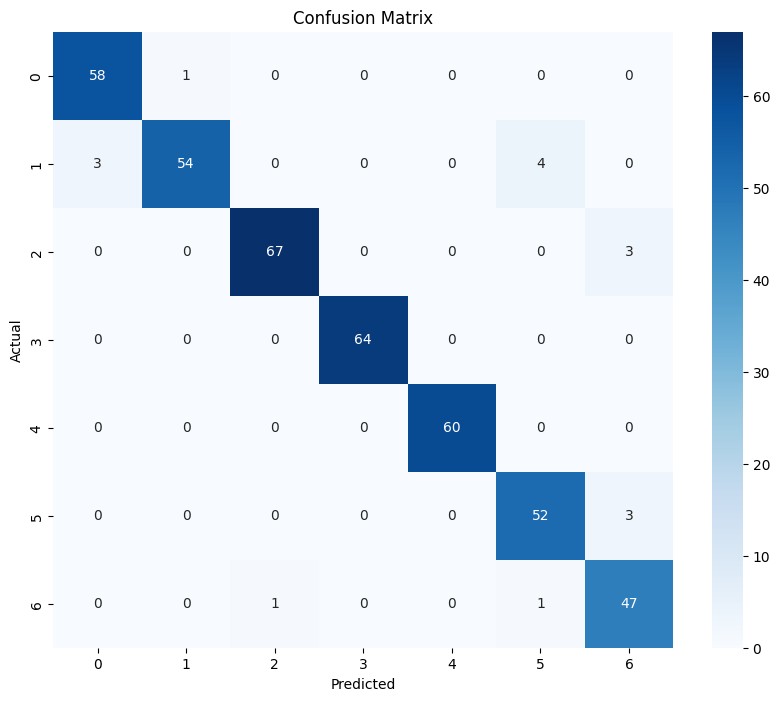

Akurasi: 0.9617224880382775
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.98      0.89      0.93        61
           2       0.99      0.96      0.97        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.91      0.95      0.93        55
           6       0.89      0.96      0.92        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

## manual + fitur importance

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array
        if isinstance(y, pd.Series):  # Check if y is a Series
            y = y.values  # Convert Series to numpy array

        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  # Check if X is a DataFrame
            X = X.values  # Convert DataFrame to numpy array

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions


0.9617224880382775


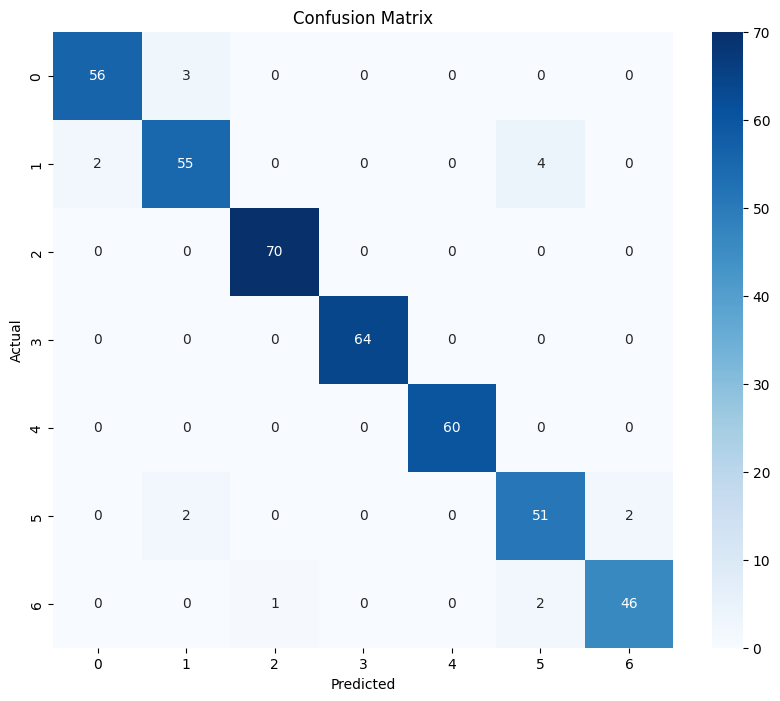

Akurasi: 0.9617224880382775
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.92      0.90      0.91        61
           2       0.99      1.00      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.89      0.93      0.91        55
           6       0.96      0.94      0.95        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=100,min_samples_split=2,max_depth=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc =  accuracy(y_test, y_pred)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# SELEKSI DARI CORELASI MATRIKS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data_obesitas.drop_duplicates(inplace=True)


In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])


In [ ]:
columns_to_encode = ['family_history_with_overweight',]
data_encoded = pd.get_dummies(data_obesitas, columns=columns_to_encode)
boolean_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

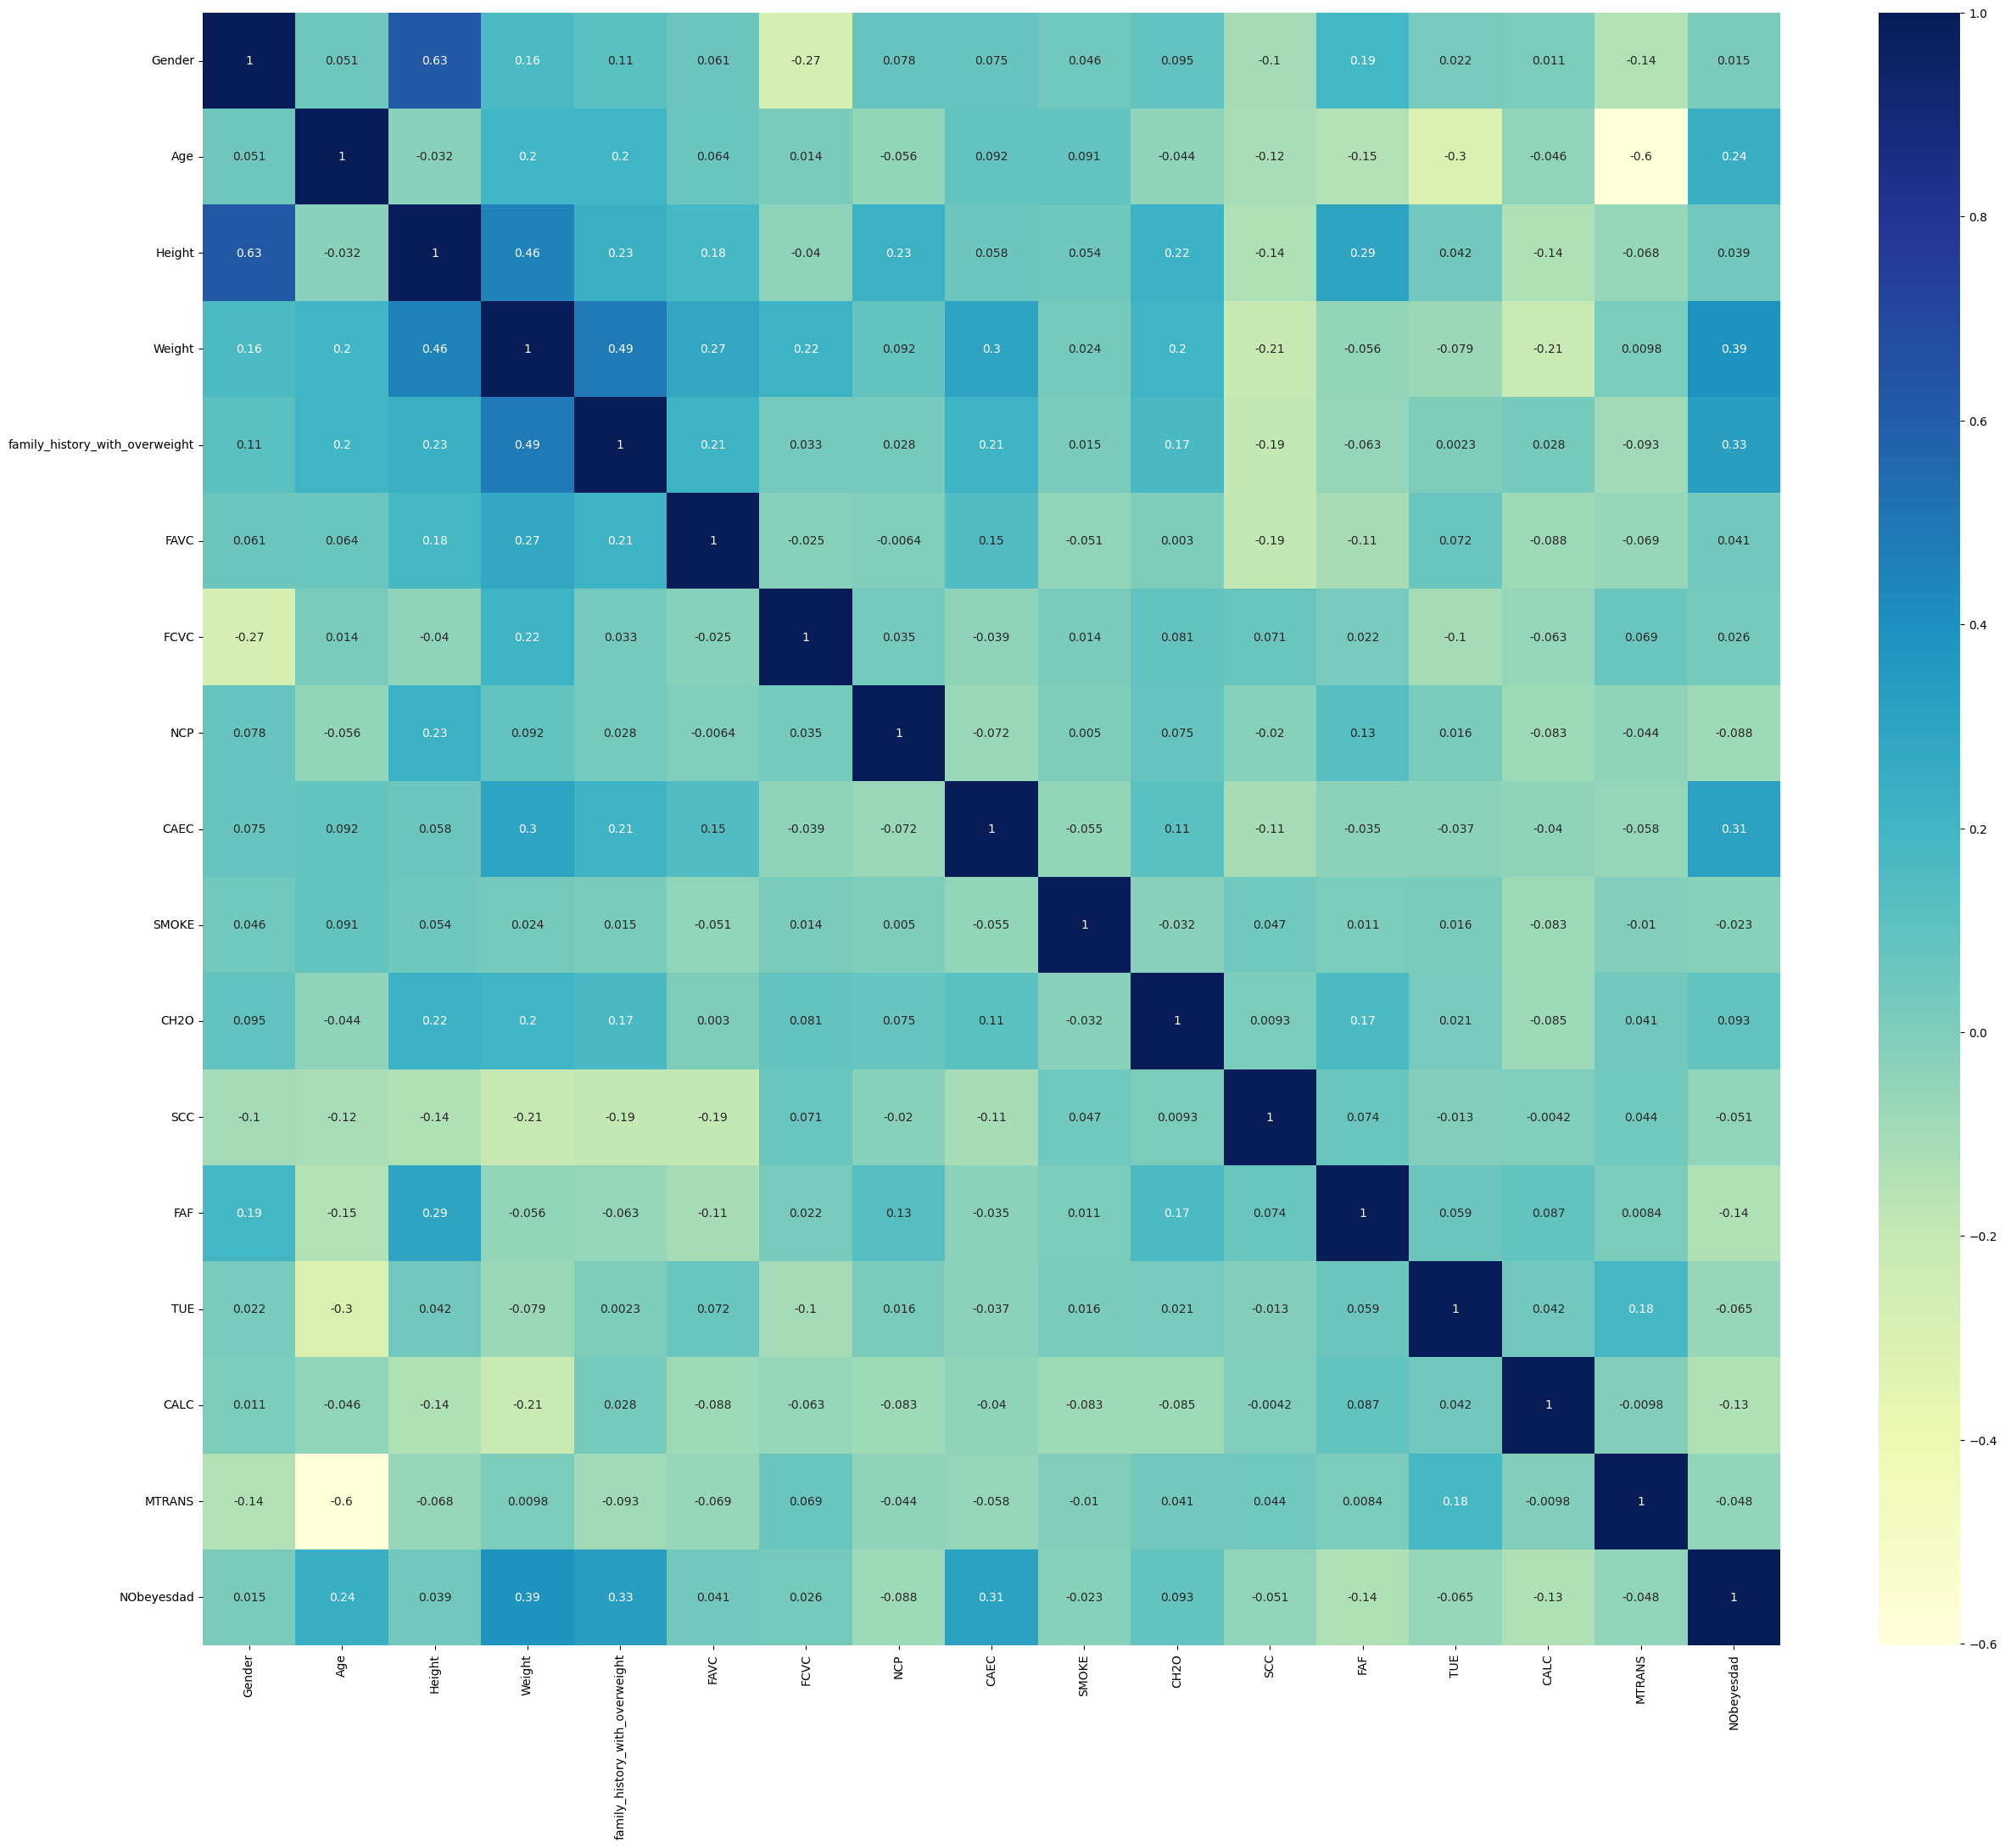

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(data_obesitas.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
data_encoded.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,family_history_with_overweight_0,family_history_with_overweight_1
0,0,21.0,1.62,64.0,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,0,1
1,0,21.0,1.52,56.0,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,0,1
2,1,23.0,1.80,77.0,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,0,1
3,1,27.0,1.80,87.0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,1,0
4,1,22.0,1.78,89.8,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,1,0


In [ ]:
data_encoded = data_encoded.drop(['Gender','Height',	'FAVC',	'FCVC','NCP','SMOKE','SCC','FAF','TUE','CALC','MTRANS'],axis=1)
data_encoded

,Age,Weight,CAEC,CH2O,NObeyesdad,family_history_with_overweight_0,family_history_with_overweight_1
0,21.000000,64.000000,2,2.000000,1,0,1
1,21.000000,56.000000,2,3.000000,1,0,1
2,23.000000,77.000000,2,2.000000,1,0,1
3,27.000000,87.000000,2,2.000000,5,1,0
4,22.000000,89.800000,2,2.000000,6,1,0
...,...,...,...,...,...,...,...
2106,20.976842,131.408528,2,1.728139,4,0,1
2107,21.982942,133.742943,2,2.005130,4,0,1
2108,22.524036,133.689352,2,2.054193,4,0,1
2109,24.361936,133.346641,2,2.852339,4,0,1


In [ ]:
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded.pop('NObeyesdad')

In [ ]:
X

,Age,Weight,CAEC,CH2O,family_history_with_overweight_0,family_history_with_overweight_1
0,21.000000,64.000000,2,2.000000,0,1
1,21.000000,56.000000,2,3.000000,0,1
2,23.000000,77.000000,2,2.000000,0,1
3,27.000000,87.000000,2,2.000000,1,0
4,22.000000,89.800000,2,2.000000,1,0
...,...,...,...,...,...,...
2106,20.976842,131.408528,2,1.728139,0,1
2107,21.982942,133.742943,2,2.005130,0,1
2108,22.524036,133.689352,2,2.054193,0,1
2109,24.361936,133.346641,2,2.852339,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LIBRARY + korelasi matrik

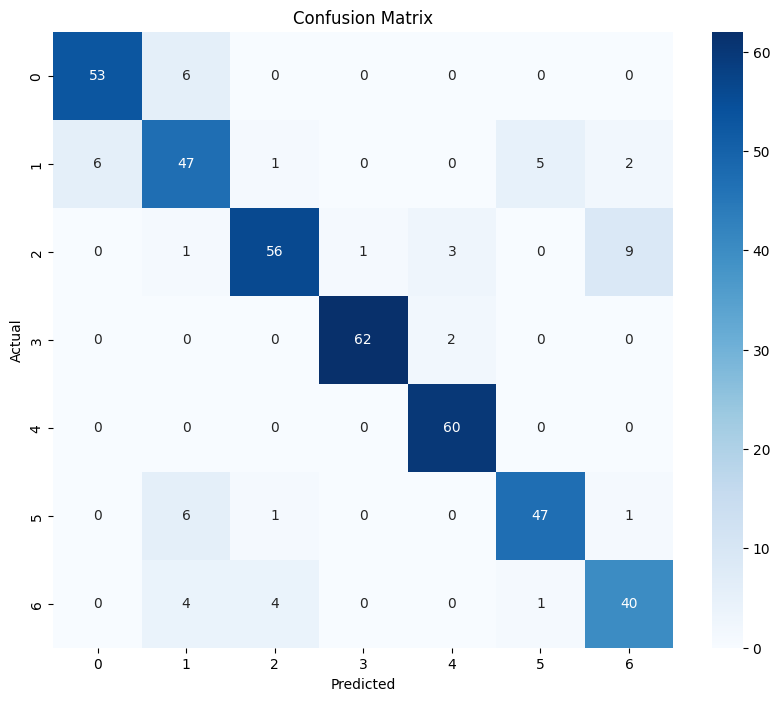

Akurasi: 0.8732057416267942
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.73      0.77      0.75        61
           2       0.90      0.80      0.85        70
           3       0.98      0.97      0.98        64
           4       0.92      1.00      0.96        60
           5       0.89      0.85      0.87        55
           6       0.77      0.82      0.79        49

    accuracy                           0.87       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.87      0.87       418



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))